# Usage of `Problem` Objects
This notebook demonstrates the usage of the ParetoBench `Problem` objects which implement common multi-objective benchmark problems in a convient vectorized format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import paretobench as pb

### Creation of Problem Objects
There are two main ways of instantiating problems in ParetoBench.
1) You can always use the classes themselves. These are exported from the main ParetoBench import and implement all parameters as arguments to `__init__` staying as close as possible to the notation used in their original publications. The number of objectives and number of decision variables are always called `m` and `n` when user-settable.
2) A more flexible way of creating problems is through `Problem.from_line_fmt(...)` which instantiates a problem from a "single line" string representation. This is just the problem name followed by its parameters in in parenthesis. For example `WFG1 (m=2, k=4, n=24)` or `ZDT1 (n=30)`. You don't need to specify all (or any) or the parameters. For example `WFG1 (m=3)` and `ZDT` are still valid and will use default values for the parameters. Instantiation from single line format allows easy creation of problems from configuration files.

In [ ]:
# Create an example problem object
prob = pb.ZDT1(n=30)
print("From __init__ method: ", prob)

# Make another one
prob = pb.WFG1(n=24, m=2, k=2)
print("Another __init__ method example: ", prob)

# Let's try using the single line format
prob = pb.Problem.from_line_fmt("ZDT1 (n=30)")
print("From single line format: ", prob)

# And another one
prob = pb.Problem.from_line_fmt("WFG1 (n=24, m=2, k=2)")
print("Another single line format example: ", prob)

# Let's try leaving out parameters
prob = pb.Problem.from_line_fmt("ZDT1")
print("Using all default arguments: ", prob)

# One final example
prob = pb.Problem.from_line_fmt("WFG1 (n=32)")
print("Using some default arguments: ", prob)

From __init__ method:  ZDT1 (n=30)
Another __init__ method example:  WFG1 (k=2, m=2, n=24)
From single line format:  ZDT1 (n=30)
Another single line format example:  WFG1 (k=2, m=2, n=24)
Using all default arguments:  ZDT1 (n=30)
Using some default arguments:  WFG1 (k=4, m=2, n=32)


### Properties of `Problem` Objects
The problem objects come with many properties that describe their inputs / outputs or information related to them. We inspect some of these in the following section.

In [3]:
# Get a problem to examine
prob = pb.Problem.from_line_fmt("CF1")
print(f"Using problem {prob}")

# Problems (usually) come with references
print()
print("Reference:")
print(prob.reference)

# Look at the decision variables (prob.n)
print()
print(f"Problem has {prob.n} decision variables:")
for idx, (lb, ub) in enumerate(zip(prob.var_lower_bounds, prob.var_upper_bounds)):
    print(f"  var[{idx}] range: [{lb:.3f}, {ub:.3f}]")

# Look at the outputs
print()
print(f"Number of objectives: {prob.m}")
print(f"Number of constraints: {prob.n_constraints}")

Using problem CF1 (a=1.0, b=10, n=10)

Reference:
Zhang, Q., Zhou, A., Zhao, S., Suganthan, P. N., Liu, W., & Tiwari, S. (2009). Multiobjective optimization Test Instances for the CEC 2009 Special Session and Competition. 31.

Problem has 10 decision variables:
  var[0] range: [0.000, 1.000]
  var[1] range: [0.000, 1.000]
  var[2] range: [0.000, 1.000]
  var[3] range: [0.000, 1.000]
  var[4] range: [0.000, 1.000]
  var[5] range: [0.000, 1.000]
  var[6] range: [0.000, 1.000]
  var[7] range: [0.000, 1.000]
  var[8] range: [0.000, 1.000]
  var[9] range: [0.000, 1.000]

Number of objectives: 2
Number of constraints: 1


### Evaluating the Problem's Objectives and Constraints
All of the problem objects are callable and accept numpy arrays with the first index being the batch index. The problems return `Population` objects which contain the decision variables, the objectives, and constraints.

In [4]:
# Create our test problem
prob = pb.Problem.from_line_fmt("CF1 (n=4)")

# Use the decision var bounds to create a set of random inputs to run on
n_samp = 4
x = np.vstack([np.random.uniform(lb, ub, n_samp) for lb, ub in zip(prob.var_lower_bounds, prob.var_upper_bounds)]).T

# Evaluate the objectives and constraints
result = prob(x)
print("Decision variables:")
print(result.x)
print()
print("Objectives:")
print(result.f)
print()
print("Constraints:")
print(result.g)

Decision variables:
[[0.83550332 0.11927148 0.02190537 0.42518093]
 [0.28895284 0.57542456 0.76805257 0.34797123]
 [0.76735637 0.1772868  0.36444079 0.34253105]
 [0.7697104  0.00232661 0.37995819 0.3275767 ]]

Objectives:
[[2.04261769 0.87064956]
 [0.90766975 0.78243049]
 [1.01764982 0.78149414]
 [1.00227039 1.06608303]]

Constraints:
[[ 1.14211612]
 [-0.02230143]
 [-0.10775473]
 [ 0.16103585]]


### Analytic Pareto Fronts
Some of the test problems come with analytic Pareto fronts. These are useful for the evaluating convergence of optimization algorithms under test. In this notebook, we demonstrate how to query points from the Pareto fronts. Problems which can return points from the Pareto front inherit from `ProblemWithPF` and problems with a fixed number of points on the Pareto front inherit from `ProblemWithFixedPF`.

Has analytic Pareto front:  True


Text(0.5, 1.0, 'ZDT3 (n=30)')

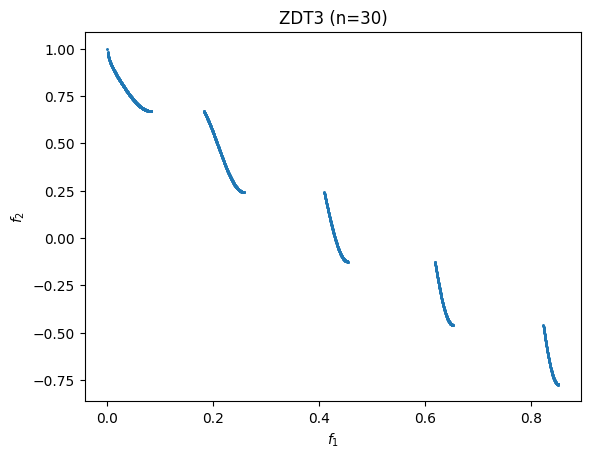

In [5]:
# Create a problem
prob = pb.Problem.from_line_fmt("ZDT3")
print("Has analytic Pareto front: ", isinstance(prob, pb.ProblemWithPF))

# Get the values for the objectives of points along the PF and plot them
f = prob.get_pareto_front(n=1000)
plt.scatter(f[:, 0], f[:, 1], s=1.25)
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.title(prob)

Has analytic Pareto front:  True


Text(0.5, 1.0, 'CF1 (a=1.0, b=10, n=10)')

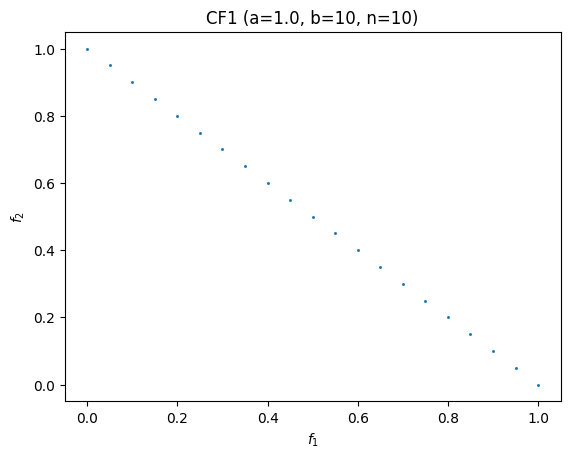

In [6]:
# Let's do it again, but for a problem with a fixed PF
prob = pb.Problem.from_line_fmt("CF1")
print("Has analytic Pareto front: ", isinstance(prob, pb.ProblemWithFixedPF))

# Get the values for the objectives of points along the PF and plot them
f = prob.get_pareto_front()
plt.scatter(f[:, 0], f[:, 1], s=1.25)
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.title(prob)